# LOGISTIC REGRESSION

### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Data Collection & Preprocessing

In [3]:
# Loading data

raw_mail_data = pd.read_csv('mail_data.csv')
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Replace missing values with null string

mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

In [9]:
mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,1,"Sorry, I'll call later"
freq,4825,30


In [10]:
mail_data.shape

(5572, 2)

### Label Encoding

In [11]:
# Labelling spam and ham mails as 0 and 1


mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Separating data as text (message) and labels (category)

X = mail_data['Message']
Y = mail_data['Category']

In [13]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [14]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


### Splitting Data into Train & Test Data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [16]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


### Feature Extraction

In [19]:
# Transform text data into feature vectors that can be used as input for the LR model

feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = 'True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert Y_train & Y_test values to integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [20]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

### Logistic Regression Model

In [24]:
lr_model = LogisticRegression()

In [25]:
# Training LR Model with training data

lr_model.fit(X_train_features, Y_train)

LogisticRegression()

### Evaluating Model

In [29]:
# Prediction on training data

train_data_prediction = lr_model.predict(X_train_features)

accuracy_train = accuracy_score(Y_train, train_data_prediction)
print("Accuracy on Training Data:", accuracy_train)

Accuracy on Training Data: 0.9670181736594121


In [31]:
# Prediction on test data
test_data_prediction = lr_model.predict(X_test_features)

accuracy_test = accuracy_score(Y_test, test_data_prediction)
print("Accuracy on Test Data:", accuracy_test)

Accuracy on Test Data: 0.9659192825112107


### Building A Prediction System

In [35]:
input_mail = ["Nah I don't think he goes to usf, he lives around here though"]

# Convert text to feature vector

input_data_features = feature_extraction.transform(input_mail)

# Making predictions

prediction = lr_model.predict(input_data_features)
print("Label Value:", prediction)

if prediction[0] == 0:
    print("SPAM MAIL")
else:
    print("HAM MAIL")

Label Value: [1]
HAM MAIL


# Naive Bayes Theorem

In [36]:
df = pd.read_csv('mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df['Category'] = df.Category.map({'ham':0, 'spam':1})
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Bag of Words

In [47]:
x_train, x_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size = 0.2, random_state = 1)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()

training_data = count_vector.fit_transform(x_train)
testing_data = count_vector.transform(x_test)

### Implementation of Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()

naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [51]:
predictions = naive_bayes.predict(testing_data)

### Model Evaluation

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [53]:
print('Accuracy Score:', format(accuracy_score(y_test, predictions)))
print('Precision Score:', format(precision_score(y_test, predictions)))
print('Recall Score:', format(recall_score(y_test, predictions)))
print('F1 Score:', format(f1_score(y_test, predictions)))

Accuracy Score: 0.989237668161435
Precision Score: 0.9787234042553191
Recall Score: 0.9387755102040817
F1 Score: 0.9583333333333333


# Analysis

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df['Length'] = df['Message'].apply(len)

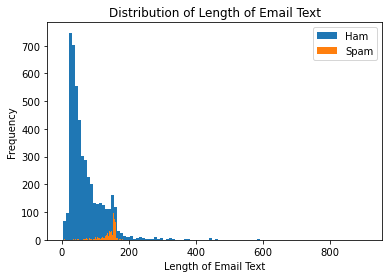

In [56]:
ham_messages_length = df[df['Category']==0] 
spam_messages_length = df[df['Category']==1]

ham_messages_length['Length'].plot(bins=100, kind='hist',label = 'Ham') 
spam_messages_length['Length'].plot(bins=100, kind='hist',label = 'Spam') 

plt.title('Distribution of Length of Email Text')
plt.xlabel('Length of Email Text')
plt.legend()